## Import Libraries & Load Data 

In [9]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,roc_curve
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import RocCurveDisplay

In [ ]:
# Loading Data 
df = pd.read_excel("Prediction_Data.xlsx","vw_churndata")

In [128]:
df.head()

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,11098-MAD,Female,30,Yes,Madhya Pradesh,0,31,Deal 1,Yes,No,...,Bank Withdrawal,95.10,6683.40,0.00,0,631.72,7315.12,Stayed,Others,Others
1,11114-PUN,Male,51,No,Punjab,5,9,Deal 5,Yes,No,...,Bank Withdrawal,49.15,169.05,0.00,10,122.37,301.42,Churned,Competitor,Competitor had better devices
2,11167-WES,Female,43,Yes,West Bengal,3,28,Deal 1,Yes,Yes,...,Bank Withdrawal,116.05,8297.50,42.57,110,1872.98,10237.91,Stayed,Others,Others
3,11179-MAH,Male,35,No,Maharashtra,10,12,NaN,Yes,No,...,Credit Card,84.40,5969.30,0.00,0,219.39,6188.69,Stayed,Others,Others
4,11180-TAM,Male,75,Yes,Tamil Nadu,12,27,Deal 2,Yes,No,...,Credit Card,72.60,4084.35,0.00,140,332.08,4556.43,Stayed,Others,Others


## Data Preprocessing and Exploratory data analysis

In [129]:
# Dropping columns that wont be useful for prediction 
df = df.drop(['Customer_ID', 'Churn_Category', 'Churn_Reason'], axis=1)
df.head()

,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,Internet_Service,...,Contract,Paperless_Billing,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status
0,Female,30,Yes,Madhya Pradesh,0,31,Deal 1,Yes,No,Yes,...,Two Year,No,Bank Withdrawal,95.10,6683.40,0.00,0,631.72,7315.12,Stayed
1,Male,51,No,Punjab,5,9,Deal 5,Yes,No,Yes,...,Month-to-Month,Yes,Bank Withdrawal,49.15,169.05,0.00,10,122.37,301.42,Churned
2,Female,43,Yes,West Bengal,3,28,Deal 1,Yes,Yes,Yes,...,Two Year,Yes,Bank Withdrawal,116.05,8297.50,42.57,110,1872.98,10237.91,Stayed
3,Male,35,No,Maharashtra,10,12,NaN,Yes,No,Yes,...,Two Year,Yes,Credit Card,84.40,5969.30,0.00,0,219.39,6188.69,Stayed
4,Male,75,Yes,Tamil Nadu,12,27,Deal 2,Yes,No,Yes,...,Two Year,Yes,Credit Card,72.60,4084.35,0.00,140,332.08,4556.43,Stayed


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6007 entries, 0 to 6006
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gender                       6007 non-null   object 
 1   Age                          6007 non-null   int64  
 2   Married                      6007 non-null   object 
 3   State                        6007 non-null   object 
 4   Number_of_Referrals          6007 non-null   int64  
 5   Tenure_in_Months             6007 non-null   int64  
 6   Value_Deal                   2710 non-null   object 
 7   Phone_Service                6007 non-null   object 
 8   Multiple_Lines               6007 non-null   object 
 9   Internet_Service             6007 non-null   object 
 10  Internet_Type                4784 non-null   object 
 11  Online_Security              6007 non-null   object 
 12  Online_Backup                6007 non-null   object 
 13  Device_Protection_

In [131]:
df.isna().sum()

Gender                            0
Age                               0
Married                           0
State                             0
Number_of_Referrals               0
Tenure_in_Months                  0
Value_Deal                     3297
Phone_Service                     0
Multiple_Lines                    0
Internet_Service                  0
Internet_Type                  1223
Online_Security                   0
Online_Backup                     0
Device_Protection_Plan            0
Premium_Support                   0
Streaming_TV                      0
Streaming_Movies                  0
Streaming_Music                   0
Unlimited_Data                    0
Contract                          0
Paperless_Billing                 0
Payment_Method                    0
Monthly_Charge                    0
Total_Charges                     0
Total_Refunds                     0
Total_Extra_Data_Charges          0
Total_Long_Distance_Charges       0
Total_Revenue               

In [132]:
# Handling Missing values 
df['Value_Deal'] = df['Value_Deal'].fillna("No Deal")
df['Internet_Type'] = df['Internet_Type'].fillna("Unknown")

In [133]:
df.isna().sum()

Gender                         0
Age                            0
Married                        0
State                          0
Number_of_Referrals            0
Tenure_in_Months               0
Value_Deal                     0
Phone_Service                  0
Multiple_Lines                 0
Internet_Service               0
Internet_Type                  0
Online_Security                0
Online_Backup                  0
Device_Protection_Plan         0
Premium_Support                0
Streaming_TV                   0
Streaming_Movies               0
Streaming_Music                0
Unlimited_Data                 0
Contract                       0
Paperless_Billing              0
Payment_Method                 0
Monthly_Charge                 0
Total_Charges                  0
Total_Refunds                  0
Total_Extra_Data_Charges       0
Total_Long_Distance_Charges    0
Total_Revenue                  0
Customer_Status                0
dtype: int64

In [134]:
# Converting Catogerical values into numerical values 
columns_to_encode = [
    'Gender', 'Married', 'State', 'Value_Deal', 'Phone_Service', 'Multiple_Lines',
    'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',
    'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV', 'Streaming_Movies',
    'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',
    'Payment_Method']

In [135]:
# Encoding catogerical varibles into numerical values using label encoder 
label_encoders = {}
for column in columns_to_encode:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

In [136]:
# Manually encode the target variable 'Customer_Status'
df['Customer_Status'] = df['Customer_Status'].map({'Stayed': 0, 'Churned': 1})

In [137]:
df.head()

,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,Internet_Service,...,Contract,Paperless_Billing,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status
0,0,30,1,11,0,31,0,1,0,1,...,2,0,0,95.10,6683.40,0.00,0,631.72,7315.12,0
1,1,51,0,15,5,9,4,1,0,1,...,0,1,0,49.15,169.05,0.00,10,122.37,301.42,1
2,0,43,1,21,3,28,0,1,1,1,...,2,1,0,116.05,8297.50,42.57,110,1872.98,10237.91,0
3,1,35,0,12,10,12,5,1,0,1,...,2,1,1,84.40,5969.30,0.00,0,219.39,6188.69,0
4,1,75,1,17,12,27,1,1,0,1,...,2,1,1,72.60,4084.35,0.00,140,332.08,4556.43,0


In [138]:
df["Customer_Status"].value_counts()

Customer_Status
0    4275
1    1732
Name: count, dtype: int64

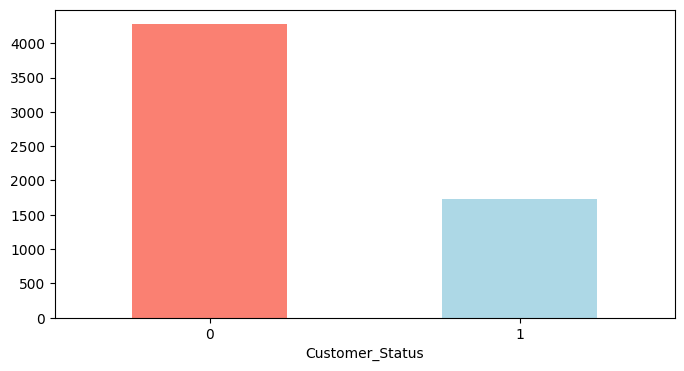

In [139]:
df["Customer_Status"].value_counts().plot(kind="bar",figsize=(8,4), color=["salmon", "lightblue"]),
plt.xticks(rotation=0);

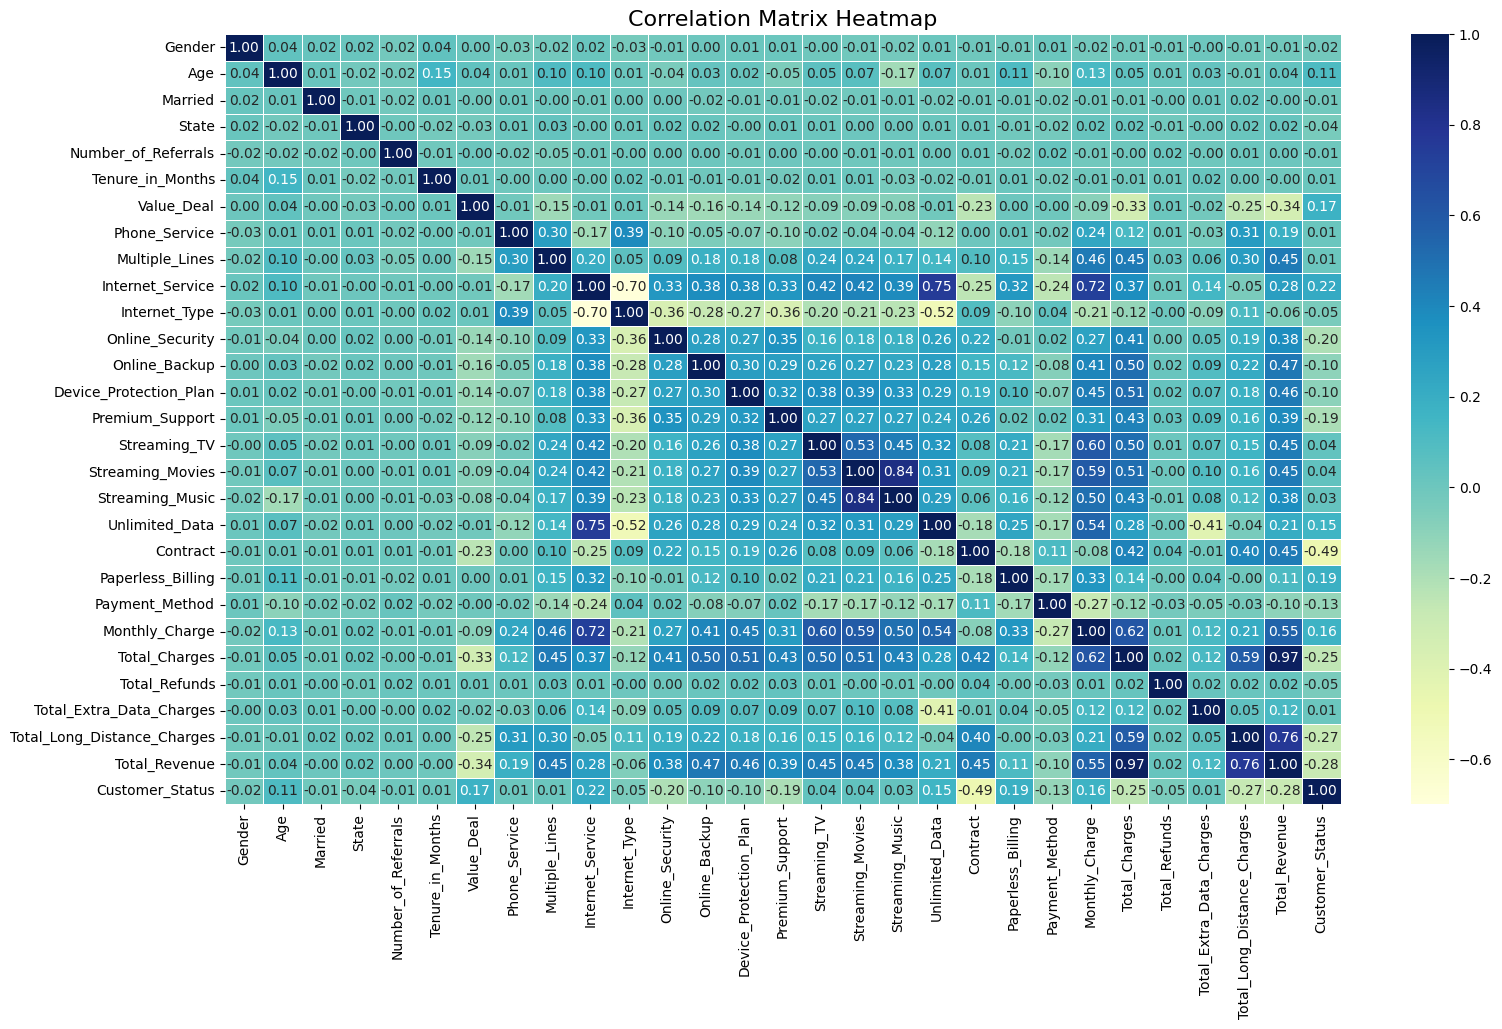

In [140]:
corr_matrix = df.corr()

fig, ax = plt.subplots(figsize=(18,10))
sns.heatmap(corr_matrix,
            annot=True,
            linewidths=0.5,
            fmt=".2f",
            cmap="YlGnBu",  # Corrected colormap
            ax=ax)

plt.title("Correlation Matrix Heatmap", fontsize=16)
plt.show()

## Splitting data into train and test split

In [141]:
# Split data into features and target
x = df.drop('Customer_Status', axis=1)
y = df['Customer_Status']

In [142]:
# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Train Random Forest Model

In [143]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [144]:
# Train the model
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

## Evaluating Model 

In [145]:
# Training and testing scores
train_score = rf_model.score(x_train, y_train)
test_score = rf_model.score(x_test, y_test)

print("Training Score:", train_score)
print("Testing Score:", test_score)

Training Score: 0.9997918834547347
Testing Score: 0.8394342762063228


## Hyperparameter Tuning with GridSearchCV

In [146]:
# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

grid_search.fit(x_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.9s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   1.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.7s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   1.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   1.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_spli

* Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
* Best Score: 0.8578563995837669

## Evaluating tuned machine learning model using:
* Accuracy
* Precision
* Recall
* F1 Score
* ROC AUC Score
* Confusion matrix
* Classification report

In [112]:
# Best tuned model from GridSearchCV
best_rf_model = grid_search.best_estimator_

In [113]:
# Predictions
y_pred = best_rf_model.predict(x_test)
y_pred_proba = best_rf_model.predict_proba(x_test)[:, 1]

In [116]:
# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')
roc_auc = roc_auc_score(y_test, y_pred_proba)

In [117]:
print("Model Evaluation Metrics:")
print(f"Accuracy       : {accuracy:.4f}")
print(f"Precision      : {precision:.4f}")
print(f"Recall         : {recall:.4f}")
print(f"F1 Score       : {f1:.4f}")
print(f"ROC AUC Score  : {roc_auc:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Model Evaluation Metrics:
Accuracy       : 0.8436
Precision      : 0.7850
Recall         : 0.6479
F1 Score       : 0.7099
ROC AUC Score  : 0.8881

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.93      0.89       847
           1       0.78      0.65      0.71       355

    accuracy                           0.84      1202
   macro avg       0.82      0.79      0.80      1202
weighted avg       0.84      0.84      0.84      1202



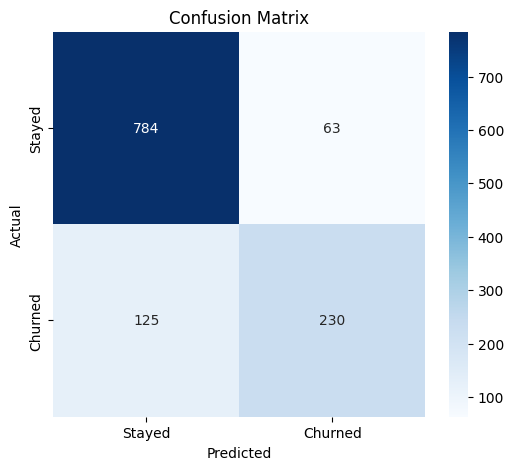

In [118]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Stayed', 'Churned'], yticklabels=['Stayed', 'Churned'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

<Figure size 600x500 with 0 Axes>

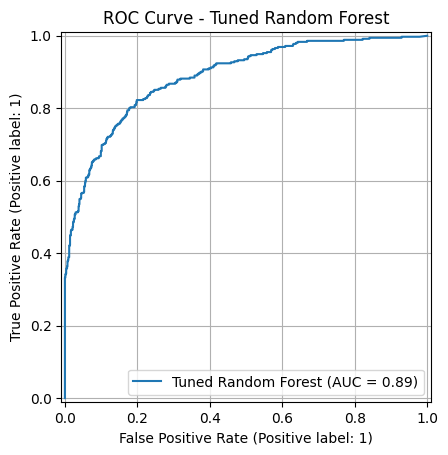

In [124]:
plt.figure(figsize=(6, 5))
RocCurveDisplay.from_estimator(best_rf_model, x_test, y_test, name="Tuned Random Forest")
plt.title("ROC Curve - Tuned Random Forest")
plt.grid(True)
plt.show()

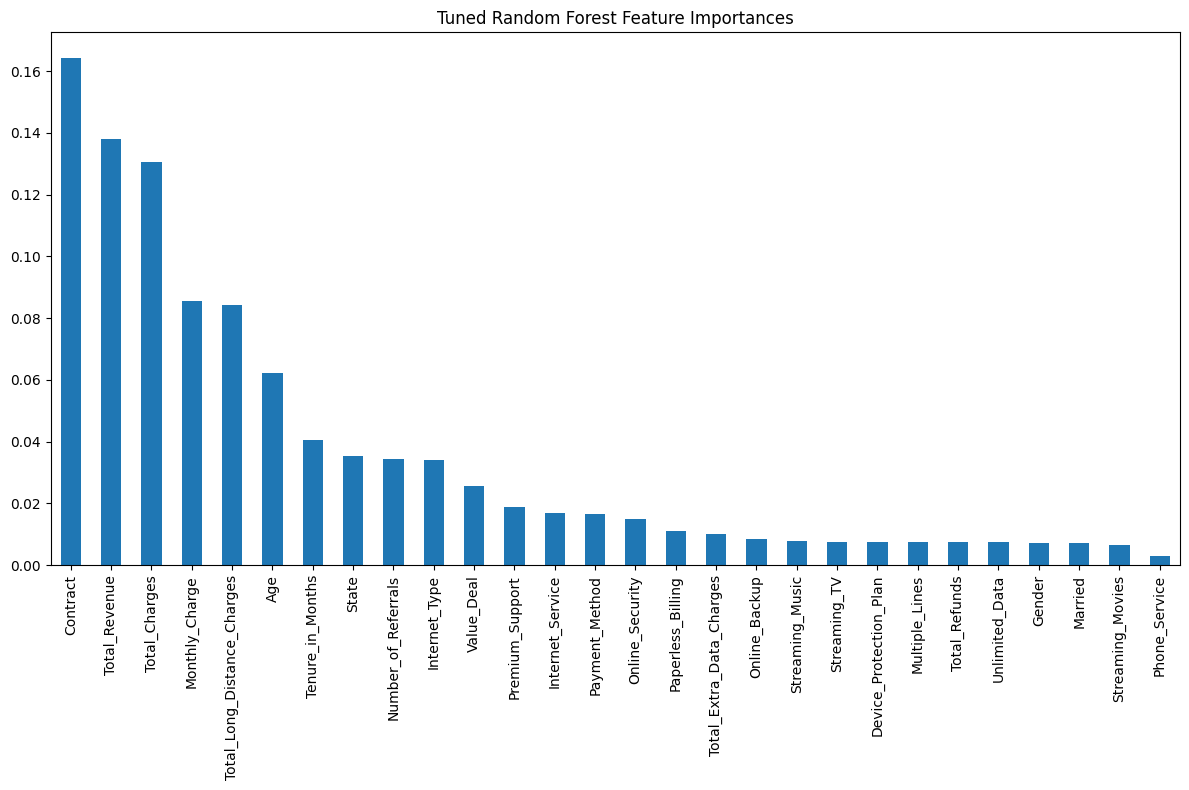

In [148]:
# Feature importances from tuned Random Forest
feature_importances = pd.Series(best_rf_model.feature_importances_, index=x_train.columns)

# Sort and plot
feature_importances.sort_values(ascending=False).plot(
    kind='bar',
    figsize=(12, 8),
    title="Tuned Random Forest Feature Importances"
)
plt.tight_layout()
plt.show()

## Use Model for Prediction on New Data

In [159]:
# Handle missing values in categorical columns (example: Value_Deal, Internet_Type)
if 'Value_Deal' in new_data.columns:
    new_data['Value_Deal'] = new_data['Value_Deal'].fillna("No Deal")

if 'Internet_Type' in new_data.columns:
    new_data['Internet_Type'] = new_data['Internet_Type'].fillna("Unknown")

# Encode categorical variables using saved label encoders
for column in new_data.select_dtypes(include=['object']).columns:
    new_data[column] = label_encoders[column].transform(new_data[column])

# Make predictions with tuned Random Forest
new_predictions = best_rf_model.predict(new_data)

# Add predictions to original DataFrame
original_data['Customer_Status_Predicted'] = new_predictions

# Filter only churned customers
churned_customers = original_data[original_data['Customer_Status_Predicted'] == 1]

# Save
churned_customers.to_csv("Predictions.csv", index=False)
print("Predictions Successfully saved to Predictions.csv")

Predictions Successfully saved to Predictions.csv
